<h1>Vectors and Vector-Valued Functions</h1>

<p>In these notes, we will need these packages. The first is in the standard library, the others must previously have been installed.</p>

In [1]:
using LinearAlgebra # for norm, dot, and cross
using Plots         # for plotting
using SymPy         # for symbolic math
using Roots         # to find zeros numerically
using QuadGK        # to integerate numerically

<p>(If the <code>MTH229 package is installed, the last four lines could simply be</code>using MTH229`.)</p>

<h2>Vectors</h2>

<p>In <code>julia</code>, creating vectors is very straightforward: in place of the "book" notation $\langle 1,2,3 \rangle$, we use square brackets, as in</p>

In [1]:
[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

<p>In Julia, this creates a vector. The output describes itself as <code>Array&#123;Int64,1&#125;</code>. This translates into an array of integers with one dimension. An array is a collection of objects stored in a multi-dimensional grid. For vectors the dimension is 1, for matrices – two-dimensional, rectangular arrays – the dimension is 2. This is important, note the difference if we leave the commas out of the above:</p>

In [1]:
[1 2 3]

1×3 Array{Int64,2}:
 1  2  3

<p>This creates a <code>1x3 Array&#123;Int64,2&#125;</code>, which has 1 row, 3 columns, 2 dimensions and stores integers. The only moral here – use commas to create vectors.</p>

<blockquote>
<p>The <code>&#91;&#93;</code> notation is used in many different ways in <code>julia</code>. In the above we see its use to combine like-type items into a collection, in this case a vector or matrix. As well, the <code>&#91;&#93;</code> notation is used to access vector components, for example <code>x&#91;2&#93;</code> would be the second component of the collection <code>x</code>. It is also common with <em>list comprehensions</em> of the form <code>&#91;x^2 for x in 1:5&#93;</code>, though this is related to the first use. More generally, identifying the different uses of matched braces: <code>&#91;&#93;</code>, <code>&#40;&#41;</code>, and <code>&#123;&#125;</code> is important in trying to read <code>julia</code> syntax.</p>
</blockquote>

<h3>Algebra of vectors</h3>

<p>Vectors have many arithmetic operations defined for them. These fit naturally into <code>julia</code>'s syntax.</p>

In [1]:
u = [1,2,3]
v = [4,5,6]
w = [1,3,5]
2*u, u + v, v - w

([2, 4, 6], [5, 7, 9], [3, 2, 1])

<p>The number of entries in a vector is determined by <code>length</code>:</p>

In [1]:
length(u)

3

<p>The norm of the vector is returned by <code>norm</code>, but <em>first</em> you need to load the <code>LinearAlgebra</code> package, as was done above. The default is to use the Euclidean norm (<code>p&#61;2</code>), though others are possible:</p>

In [1]:
norm(u)

3.7416573867739413

<p>This makes finding a unit vector trivial:</p>

In [1]:
u/norm(u)

3-element Array{Float64,1}:
 0.2672612419124244
 0.5345224838248488
 0.8017837257372732

<p>We make a function to compute the unit vector of any vector:</p>

In [1]:
uvec(u) = u/norm(u)

uvec (generic function with 1 method)

<p>If we give our variable names <code>u\hat&lt;tab&gt;</code> then a "hat" will match the book for a unit vector:</p>

In [1]:
û = uvec(u)

3-element Array{Float64,1}:
 0.2672612419124244
 0.5345224838248488
 0.8017837257372732

<p>(There is nothing but a naming convention. Using a hat does not by itself make something a unit vector.)</p>

<p><p></p>

<p>Here we verify that the triangle inequality holds for <code>u</code> and <code>v</code>:</p>

In [1]:
norm(u+v) <= norm(u) + norm(v)

true

<p>The <a href="http://en.wikipedia.org/wiki/Dot_product">dot product</a> is defined for any two vectors of the same length and is implemented via <code>dot</code>:</p>

In [1]:
dot(u, v)

32

<p>For those who like to match the text book, you can use <code>\cdot&lt;tab&gt;</code> as an <a href="http://en.wikipedia.org/wiki/Infix_notation">infix</a> operation:</p>

In [1]:
u ⋅ v

32

<p>using $\hat{u} \cdot \hat{v} = \cos(\theta)$ To find the angle between the two vectors <code>u</code> and <code>v</code> we have:</p>

In [1]:
acos(uvec(u) ⋅ uvec(v))

0.2257261285527342

<p>The projection of <code>u</code> along <code>v</code> is given by the projection formula $u \cdot \hat{v} \hat{v}$:</p>

In [1]:
ev = uvec(v)
(u ⋅ ev) * ev          # parentheses are not needed here, as dot happens before *

3-element Array{Float64,1}:
 1.6623376623376622
 2.0779220779220777
 2.493506493506493 

<p>Lets break <code>u</code> up into a parallel and perpendicular components in terms of <code>v</code>:</p>

In [1]:
ev = uvec(v)
upar = (u ⋅ ev) * ev
uperp = u - upar

3-element Array{Float64,1}:
 -0.6623376623376622 
 -0.07792207792207773
  0.506493506493507  

<p>And we check that <code>uperp</code> is indeed perpendicular, as it should have a 0 dot product with <code>v</code>:</p>

In [1]:
uperp ⋅ v          # 0 up to roundoff errors

4.440892098500626e-15

<hr />

<p>For 3D vectors, like <code>u</code> and <code>v</code>, the <a href="http://en.wikipedia.org/wiki/Cross_product">cross product</a> is defined and implemented in <code>cross</code>:</p>

In [1]:
cross(u, v)

3-element Array{Int64,1}:
 -3
  6
 -3

<p>Again, an infix operator is available: <code>\times&lt;tab&gt;</code>:</p>

In [1]:
u × v

3-element Array{Int64,1}:
 -3
  6
 -3

<p>Here we verify for these vectors that the cross product is not commutative, but rather anti-commutative:</p>

In [1]:
(u × v) - (v × u), (u × v) + (v × u)

([-6, 12, -6], [0, 0, 0])

<p>Here we verify that the cross product is not-associative</p>

In [1]:
left = (u × v) × w              # also cross(cross(u, v), w)
right = u × (v × w)             # and  cross(u, cross(v, w))
left - right

3-element Array{Int64,1}:
 -17
  -2
  13

<p>And this finds, again, the angle between <code>u</code> and <code>v</code>:</p>

In [1]:
û, v̂ = uvec(u), uvec(v)         # u\hat<tab> and v\hat<tab> to enter
asin(norm( û × v̂ ))

0.22572612855273397

<p>Let's verify that $\| u \times v \|^2 = \| u \|^2 \| v\|^2 - (u \cdot v)^2$:</p>

In [1]:
left = norm( u × v )^2
right = norm(u)^2 * norm(v)^2 - (u ⋅ v)^2
left - right                    # up to round off error

-2.2737367544323206e-13

<h2>Vector-valued functions</h2>

<p>A general definition of a function is a mapping from a domain to a range. A <em>vector-valued function</em> is a function which takes a value from the real line and returns a vector. In shorthand, $f: R \rightarrow R^n$, where $n=2,3, ...$. In this section, we see how to define such functions, how to operate on them, and visualize them. In this specific case of a function from the real line to 2 or 3 dimensions, the term parameterized curve is used to describe the function.</p>

<h3>Two possible approaches</h3>

<p>In <code>julia</code> two reasonable approaches to implementing a vector-valued function are:</p>

<ul>
<li><p>a function that returns a vector, as in</p>
</li>
</ul>

In [1]:
vv(t) = [sin(t), cos(t), t]

vv (generic function with 1 method)

<ul>
<li><p>a vector of functions, as in</p>
</li>
</ul>

In [1]:
vf = [sin, cos, t -> t]

3-element Array{Function,1}:
 sin                                             
 cos                                             
 getfield(WeavePynb.ZKWQZSUDT, Symbol("##1#2"))()

<p>The latter uses an anonymous function in its last component. One can convert between the two representations using a comprehension:</p>

In [1]:
as_vf(vv,n=length(vv(0))) = [t -> vv(t)[i] for i in 1:n]
as_vv(vf) = t -> [f(t) for f in vf]

as_vv (generic function with 1 method)

<p>(The <code>as_vf</code> function needs to know the $n$ in $R^n$. It can be specifed as a second argument or, by default, is computed from the value of <code>vv&#40;0&#41;</code>.)</p>

<p>The function that returns a vector is generally easier to work with, except for the case of plotting, so we will functions that return a vector (<code>vv</code>).</p>

<h2>Some examples</h2>

<h3>Parameterizing a line</h3>

<p>As with most cases in math, we begin with lines. A line in 2 or 3 dimensions can be thought of in terms of scalar multiples of a vector from a fixed point. Let $p$ be the fixed point, and $v$ the vector, then we can represent any point on a line going through $p$ in the direction of $v$ by:</p>


$$
p + t v, \quad -\infty < t < \infty.
$$


<p>In <code>julia</code>, we have, for example:</p>

In [1]:
p = [1,2,3]
v = [3,2,1]
f(t) = p + t*v
f(0), f(1), f(2)

([1, 2, 3], [4, 4, 4], [7, 6, 5])

<h3>A helix</h3>

<p>A typical helix is parameterized by</p>

In [1]:
helix(t) = [sin(t), cos(t), t]

helix (generic function with 1 method)

<h3>A pringle</h3>

<p>Another example we will use, is this function, which when graphed will make a "pringle":</p>

In [1]:
pringle(t) = [cos(t), sin(t), sin(2t)]

pringle (generic function with 1 method)

<p>Two-dimensional vector-valued are produced in a similar manner with just two components being satisfied.</p>

<h3>Visualizing vector-valued functions.</h3>

<p>We have used the <code>Plots</code> package for plotting, primarily as it has many conveniences. In particular, we can plot the function $f$ over $[a,b]$ through the command <code>plot&#40;f, a, b&#41;</code>. This is a convenience for the task of:</p>

<ul>
<li><p>generating $x$ values between $a$ and $b$;</p>
</li>
<li><p>computing the $y$ values, $f(x)$;</p>
</li>
<li><p>plotting the paired points $(x,y)$ and connecting with a line, as needed.</p>
</li>
</ul>

<p>For plots in 3 dimensions, however, at times must follow steps like the above, rather than use a more simplified interface.</p>

<p>To review how to do the three steps above, we have</p>

<blockquote>
<p>generating $x$ values between $a$ and $b$:</p>
</blockquote>

<p>We have two basic ways to do this: Either through the notation <code>xs&#61;a:h:b</code> which steps from <code>a</code> towards <code>b</code> by steps of size <code>h</code>. Or <code>xs&#61;range&#40;a, stop&#61;b, length&#61;n&#41;</code> which finds <code>n</code> evenly spaced points from <code>a</code> to <code>b</code>.</p>

<blockquote>
<p>computing the $y$ values, $f(x)$:</p>
</blockquote>

<p>If we have a function already defined, then the "dot" syntax allows one to easily broadcast over the <code>x</code> values, as in <code>ys &#61; f.&#40;xs&#41;</code>.</p>

<p>If we have a mathematical expression to apply to the <code>x</code> values, we can use a comprenshion, as in <code>ys&#61;&#91;sin&#40;2x&#41; for x in xs&#93;</code>.</p>

<blockquote>
<p>plotting the paired points $(x,y)$ and connecting with a line:</p>
</blockquote>

<p>The call <code>plot&#40;xs,ys&#41;</code> will generate a line plot. The <code>scatter</code> function is used to plot just the points.</p>

<h5>Example</h5>

<p>We make a plot of the sine curve over $[0,2\pi]$ and its tangent line at $c=\pi/4$, as follows:</p>

<p>First, we plot the sine curve:</p>

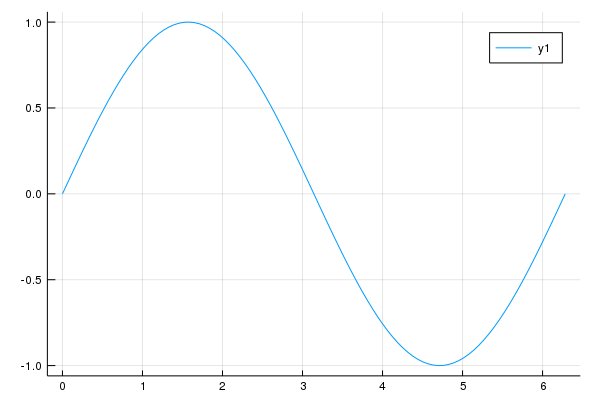

In [1]:
f(x) = sin(x)
xs = range(0, stop=2pi, length=100)  # 100 points from 0 to 2pi, evenly spaced
ys = sin.(xs)
plot(xs, ys)

<p>We <em>add</em> to the graphic, using the related <code>plot&#33;</code> function. Here we add a tangent line at $c=\pi/4$:</p>

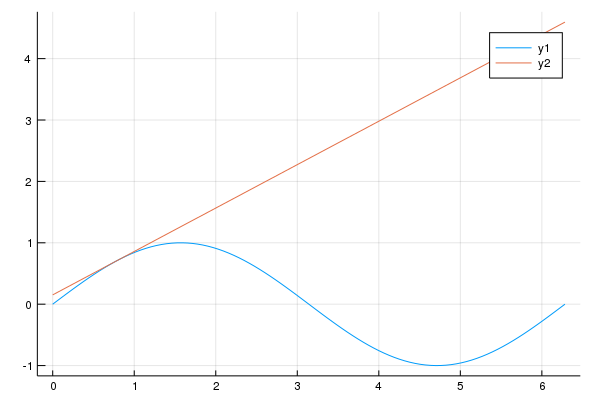

In [1]:
c = pi/4; m = cos(c)
tl(x) = f(c) + m * (x-c)
tls = tl.(xs)
plot(xs, ys)  # redo plot
plot!(xs, tls) # add tangent line

<p>To make a <em>parametric</em> plot of $(f(x), g(x))$ is <em>similar</em>, though both the <code>xs</code> and <code>ys</code> are generated in terms of $t$ values. For example, here we plot $(\sin(t), \sin(2t))$ over $[0, 2pi]$:</p>

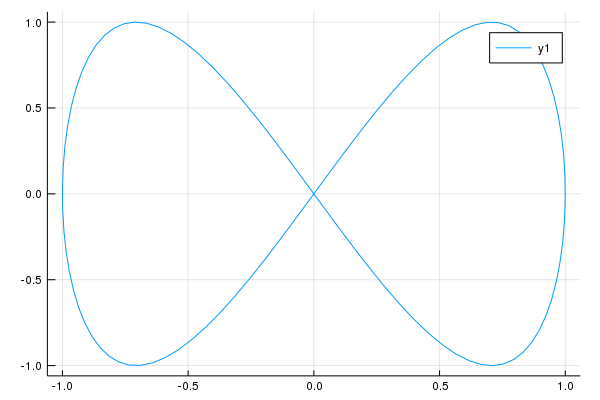

In [1]:
ts = range(0, stop=2pi, length=100)
xs = sin.(ts)
ys = sin.(2ts)
plot(xs, ys)

<p>(There is also the interface <code>plot&#40;f1, f2, a, b&#41;</code>, but we will not use this.)</p>

<p>For a 3-dimensional parametric plot, the <code>plot</code> function is also used, the steps are identical. The helix, a plot of $(\sin(t), \cos(t), t)$ may be visualized through:</p>

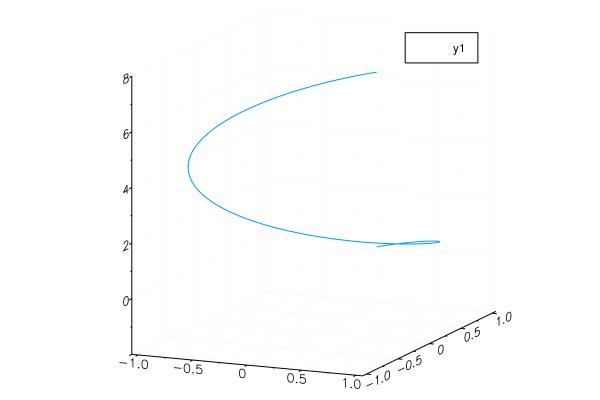

In [1]:
ts = range(0, stop=2pi, length=100)
xs = sin.(ts)
ys = cos.(ts)
zs = ts
plot(xs, ys, zs)

<p>How to plot the <em>vector-valued</em> function <code>helix&#40;t&#41;</code>?</p>

<p>The output of <code>helix.&#40;ts&#41;</code> is a vector of vectors:</p>

In [1]:
ts = 1:4
helix.(ts)

4-element Array{Array{Float64,1},1}:
 [0.841471, 0.540302, 1.0]  
 [0.909297, -0.416147, 2.0] 
 [0.14112, -0.989992, 3.0]  
 [-0.756802, -0.653644, 4.0]

<p>This is in the <em>wrong</em> order, as we need <code>xs</code> to be the first entry of each answer, <code>ys</code> the second, and <code>zs</code> the third. Some data reshaping is necessary. The following function <code>xs_ys</code> extracts values for <code>xs</code>, <code>ys</code>, and optionally <code>zs</code>, from a vector of vectors:</p>

In [1]:
xs_ys(vs) = (A=hcat(vs...); Tuple([A[i,:] for i in eachindex(vs[1])]))

xs_ys (generic function with 1 method)

<p>For our example, you can see how the values are collected:</p>

In [1]:
xs_ys(helix.(ts))

([0.841471, 0.909297, 0.14112, -0.756802], [0.540302, -0.416147, -0.989992, -0.653644], [1.0, 2.0, 3.0, 4.0])

<p>We add a few different calling methods, that may prove convenient:</p>

In [1]:
xs_ys(v,vs...) = xs_ys([v, vs...])
xs_ys(r::Function, a, b, n=100) = (ts = range(a, stop=b, length=n); xs_ys(r.(ts)))

xs_ys (generic function with 4 methods)

<p>The first allows the vectors to be specified as arguments to the function, the second a convenient wrapper to the process of creating some <code>ts</code> over <code>&#91;a,b&#93;</code> and then corresponding <code>xs</code>, <code>ys</code>, and (optionally) <code>zs</code>.</p>

<p>(This function is in the <code>MTH229</code> convenient package.)</p>

<p>With such a funtion, the above 3D graph could also have been generated through:</p>

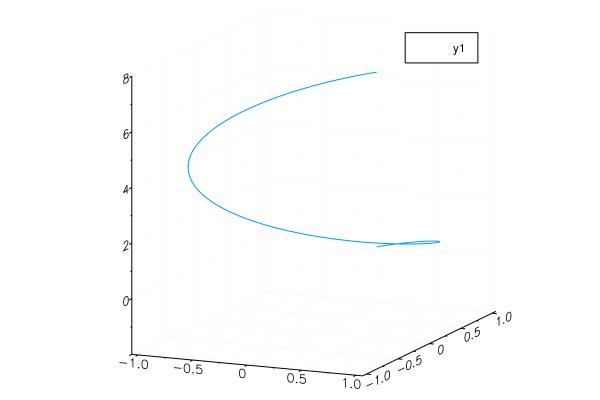

In [1]:
ts = range(0, stop=2pi, length=100)
xs, ys, zs = xs_ys(helix.(ts))
plot(xs, ys, zs)

<p>The last two steps can be combined as:</p>

In [1]:
ts = range(0, stop=2pi, length=100)
plot(xs_ys(helix.(ts))...)

<p>Using "splatting" to create 3 arguments for <code>plot</code> from the container with 3 components returned by <code>xs_ys</code>.</p>

<p>Finally, these two steps could be just one, through the alternate iterface:</p>

In [1]:
plot(xs_ys(helix, 0, 2pi)...)

<p>As another example, this will plot the <code>pringle</code> function:</p>

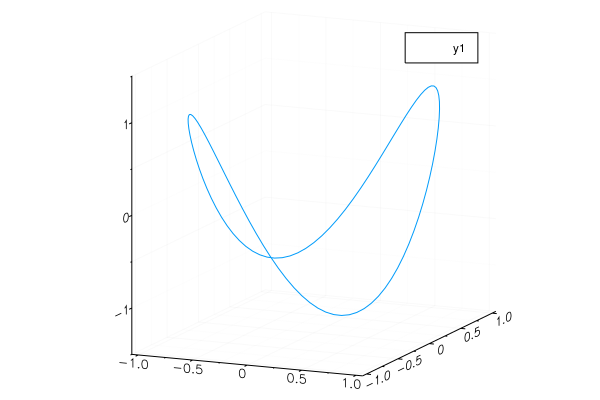

In [1]:
ts =  range(0, stop=2pi, length=100)
plot(xs_ys(pringle.(ts))...)

<h2>Calculus of vector-valued functions</h2>

<p>For function $f: R^1 \rightarrow R^1$ derivatives can be taken using automatic differentiation, as implemented in <code>ForwardDiff</code> or by finite differencing. The latter allows the same definition in the vector valued case, so we will use that:</p>

In [1]:
D1(r::Function, h=1e-4) = t -> (r(t+h) - r(t-h)) / (2h)

D1 (generic function with 2 methods)

In [1]:
r(t) = [sin(t), cos(t), t]
D1(r)(0)

3-element Array{Float64,1}:
 0.9999999983333334
 0.0               
 1.0               

<p>Though in general it can be a bad idea to iterate differencing, here the approximation isn't bad. This tests the maximum difference of the second derivative's error</p>

In [1]:
ts = range(0, stop=2pi, length=1000)
D2(f) = D1(D1(f))
maximum([norm(D2(r)(t) - [-sin(t), -cos(t), 0]) for t in ts])

1.7411125000106153e-8

<p>As with single variable calculus, the derivative may be found using automatic differentiation, implemented in the <code>ForwardDiff</code> package. This is more accurate than the above and nearly as applicable. Here we overload the <code>adjoint</code> function to provide the mathematical notation <code>f&#39;</code>:</p>

In [1]:
using ForwardDiff
D(f::Function, n=1) = n > 1 ? D(D(f), n-1) : t -> ForwardDiff.derivative(f, float(t))
Base.adjoint(f::Function) = D(f)

In [1]:
note("""Again, this is in the `MTH229` convenience package. The adjoint function is understood to be a matrix operation and the postfix prime notation is an alias. Redefining it, as above, is generally considered bad form, as it will conflict with usage for arrays of functions. As this is atpyical usage for this task, and the familiar calculus notation is very useful, we do so here.
""")

<div class="alert alert-info" role="alert">

<div class="markdown"><p>Again, this is in the <code>MTH229</code> convenience package. The adjoint function is understood to be a matrix operation and the postfix prime notation is an alias. Redefining it, as above, is generally considered bad form, as it will conflict with usage for arrays of functions. As this is atpyical usage for this task, and the familiar calculus notation is very useful, we do so here.</p>
</div>

</div>


<p>Then we have much improved accuracy:</p>

In [1]:
ts = range(0, stop=2pi, length=1000)
maximum([norm(r''(t) - [-sin(t), -cos(t), 0]) for t in ts])

0.0

<h3>Visualizing tangent vectors</h3>

<p>Adding an arrow to the plot is not as easy as it should be.  In <code>Plots</code> the <code>quiver</code> function is used to add an arrow, but as of writing, there is no 3D support for this function. In the following, we use a line segment for that case. As well, the <code>quiver</code> function is well suited for adding many arrows, but a bit cumbersome for just one, given data coming from a vector-valued function. This <code>arrow&#33;</code> function makes adding as single arrow fairly easy, by specifing the point to anchor it and the vector representing it.</p>

In [1]:
function arrow!(plt::Plots.Plot, p, v; kwargs...)
  if length(p) == 2
     quiver!(plt, xs_ys([p])..., quiver=Tuple(xs_ys([v])); kwargs...)
  elseif length(p) == 3
    # 3d quiver needs support
    # https://github.com/JuliaPlots/Plots.jl/issues/319#issue-159652535
    # headless arrow instead
    plot!(plt, xs_ys(p, p+v)...; kwargs...)
	end
end
arrow!(p,v;kwargs...) = arrow!(Plots.current(), p, v; kwargs...)

arrow! (generic function with 2 methods)

<p>Here we see how to use <code>arrow&#33;</code> by adding vectors along the pringle space curve:</p>

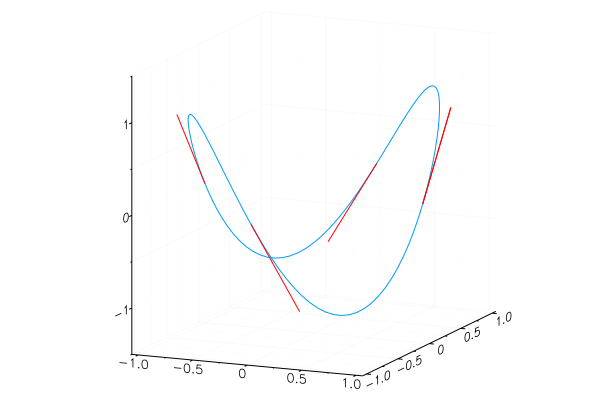

In [1]:
ts = range(0, stop=2pi, length=100)
plt = plot(xs_ys(pringle.(ts))..., legend=false)

ts = range(0, stop=2pi, length=5)
for t0 in ts
  p = pringle(t0)
  T = uvec(pringle'(t0))
  arrow!(plt, p, T, color="red")
end
plt

<h5>Example: tangent, normal, binormal</h5>

<p>A smooth space curve has a tangent vector, as drawn, but also a normal and binormal vector for each time $t$. These may be difficult to compute by hand, but relatively straight forward numerically, as seen below.</p>

<p>The (unit) tangent vector is a the unit vector or $f'$, $T=f'/\|f'\|$. The (unit) normal vector is the unit vector of $T'$, $N=T'/\|T'\|$. Finally, the binormal is a unit vector perpendicular to both, or proportional to $T × N$.</p>

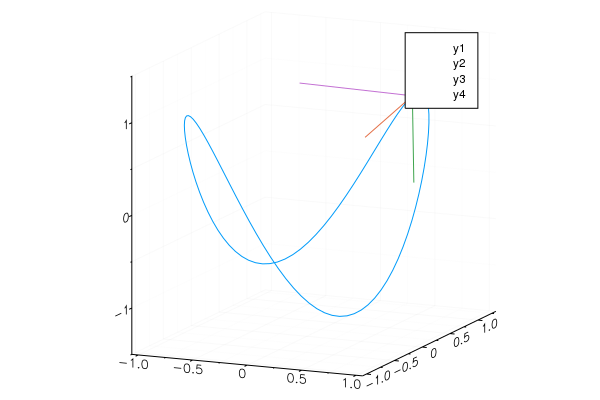

In [1]:
r(t) = pringle(t)
a, b = 0, 2pi
t0 = 1.0

ts = range(a, stop=b, length=100)
plt = plot(xs_ys(r.(ts))...)

T(t) = uvec(r'(t))
N(t) = uvec(T'(t))
B(t) = uvec(T(t) × N(t))

p = pringle(t0)
arrow!(p, T(t0))
arrow!(p, N(t0))
arrow!(p, B(t0))

<p>There is a fact for fixed-length vector functions (that is, $\|r(t)\|=c$ for all $t$) that the derivative and function are orthogonal. It should so so then that not only is $B$ orthogonal to $T$ and $N$, but also $N$ is orthogonal to $T$. This might be visible in the picture, here we verify it for each point in <code>ts</code>:</p>

In [1]:
maximum(abs.([T(t) ⋅ N(t) for t in ts]))

4.163336342344337e-16

<p>This is <strong>not</strong> the case, were unit vectors not involved:</p>

In [1]:
T1(t) = r'(t)
N1(t) = T1'(t)
maximum(abs.([T1(t) ⋅ N1(t) for t in ts]))

3.9994965106955003

<h3>Arclength</h3>

<p>The length of a parameterized curve is given by the formula</p>


$$
s = \int_a^b \| r'(t) \| dt
$$


<p>We can compute this easily in <code>julia</code>. For our pringle we have the length of one turn is found with:</p>

In [1]:
using QuadGK
r(t) = [cos(t), sin(t), sin(2t)]
ds(t) = norm(r'(t))
quadgk(ds, 0, 2pi)[1]        # first value returned is answer (second is error)

10.540734326381326

<p>This can also be done with with composition (<code>∘</code> typed as <code>\circ&#91;tab&#93;</code>):</p>

In [1]:
quadgk(norm ∘ r', 0, 2pi)[1]

10.540734326381326

<p>We put this into a function for convenient usage:</p>

In [1]:
arclength(r::Function, a::Real, b::Real) = quadgk(norm ∘ r', a, b)[1]

arclength (generic function with 1 method)

<h3>Parameterizing by arc length.</h3>

<p>Let $r(t)$ be a parameterization of a curve. The same space curve can have many different parameterizations, in fact any monotonically increasing function <code>g</code> gives a new parameterization via <code>r&#40;g&#40;t&#41;&#41;</code>. Parameterizing by arclength is a useful way to talk about a specific parameter. Basically, this is a parameterization so the that arclength between 0 and $s$ is just $s$. Mathematically, the arclength function is monotonic, so we just need to take its inverse and call that <code>g</code>. Finding the inverse is always possible due to monotonicity, but may not be algebraically possible. However, we have numeric tools to approximate it. For example,</p>

In [1]:
r(t) = [cos(t), sin(t), sin(2t)]      # pringle
s(t) = arclength(r, 0, t)

s (generic function with 1 method)

<p>How to invert? We use the <code>fzero</code> method from <code>Roots</code> and bracketing, making an assumption that <code>t</code> is positive and the arclength is less than 100:</p>

In [1]:
using Roots
g(u) = fzero(t -> s(t) - u, (-1, 100))

g (generic function with 1 method)

<p>Then the parameterization is found by composition</p>

In [1]:
rs(t) = r(g(t))

rs (generic function with 1 method)

<p>Here automatic differentiation won't work, as it doesn't work over <code>g</code>, so we use <code>D1</code>, defined above, to find the approximate derivative</p>

In [1]:
quadgk(t -> norm(D1(rs)(t)), 0, 2)[1]  # should be around 2

1.9999999911498048

<h4>Curvature</h4>

<p>The curvature can be computed different ways. One is that the curvature is the norm of the derivative of the tangent vector when the curve is parameterized by arc length. But more importantly, we have this formula  which does not require a special parameterization, but does require a 3D vector-valued function:</p>


$$
\kappa = \frac{\| r'(t) \times r''(t) \|}{\| r'(t) \|^3}
$$


In [1]:
kappa(t) = norm( r'(t) × r''(t) ) / norm(r'(t))^3

kappa (generic function with 1 method)

<h2>Symbolic math and parameterized curves</h2>

<p>Many of the above computations can be done symbolically to match the work done with paper and pencil. Here we see how:</p>

In [1]:
using SymPy
@vars t  # create a symbolic variable

(t,)

<p>With the function</p>

In [1]:
r(t) = [sin(t), cos(t), t]

r (generic function with 1 method)

<p>We can create a symbolic expression by evaluating <code>r</code> at <code>t</code>:</p>

In [1]:
u = r(t)

<p>The usual operations work as expected:</p>

In [1]:
2u
u + u
u ⋅ u
u × u

<p>More complicated expressions are possible</p>

In [1]:
u ⋅ u - norm(u)^2

<p>The above should be $0$ – for real valued vectors, but as <code>SymPy</code> does not make that assumption unless asked. Here we try again:</p>

In [1]:
@vars t real=true
u = r(t)
u ⋅ u - norm(u)^2

<p>We can compute quantities symbolically. For example, the arclength (where we use t twice, though differently):</p>

In [1]:
integrate(norm(diff.(u)), (t, 0, t)) |> simplify   # integrate(ex, (var, a, b))

<p>And the curvature:</p>

In [1]:
κ = norm(diff.(u) × diff.(u,t,2)) / norm(diff.(u))^3 |> simplify

<p>Of course, not all functions are so tractable as this example and numeric integration may still be required to get an answer.</p>